# Librosa
## Espectrogramas y series temporales a partir de un archivo de audio

En vista de que algunos de nosotros reportamos problemáticas referentes a versiones no compatibles al instalar la paquetería de **AudioLab** para el procesamiento de sonido, una opción alternativa es la paquetería **librosa**. La cual sirve para el procesamiento y análisis de audio y música.Proporciona los componentes básicos necesarios para crear sistemas de recuperación de información musical.

Para esta práctica necesitaremos una archivo de audio, sino cuentas con uno en el canal de SoundCloud (https://soundcloud.com/golem-audio) del laboratorio.

Librosa es una paquetería de python por lo que deberás ceriorarte de que cuentes con ello. Yo cuento con linux y para instalar python en la terminal se hace de esta forma.
```python
pip install python
```
Si ya lo tenías instalado no hay problema.

Para instalar librosa en tu máquina basta con correr la siguiente línea de código:

```python
pip install librosa
```

Ahora estamos listos para implementar librosa.  El código lo puedes copiar y ejecutar como un script de python o de manera interactiva con ipython.

In [1]:
import librosa


In [2]:
# Paqueterias necesarias para la exploración de datos

import matplotlib.pyplot as plt
import numpy as np

*Librosa* nos ayudará a procesar el archivo de audio. Como extras agregamos la paquetería **numpy** para hacer una serie y a **matplotlib** para graficar el espectrograma.

In [3]:
# Para una visualización más interactiva defino esta función que básicamente tiene todo lo que me gusta en cuanto a gráficas.

def set_default(figsize=(10, 10), dpi=100):
    plt.style.use([ 'dark_background','bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)
    
    
    

In [4]:
# Definimos el tamaño de las gráficas
set_default(figsize=(16, 8))

### Espectrograma
Resulta de una gráfica tridimensional que representa la energía del contenido frecuencial de la señal según va variando esta a lo largo del tiempo.




In [5]:
audio = '/home/chicarata/Documentos/SS/audio.mp3'
y, sampling_rate = librosa.load(audio)
sampling_rate


/home/chicarata/anaconda3/envs/pDL/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


22050

Veamos qué hace líena por línea.
```python
audio= '/home/chicarata/Documentos/SS/audio.mp3'
```
Guarda como un tipo de variable de cadena la ruta donde se encuentra el audio de interes en la variable que llamamos *audio*

```python
y, sample_rates= librosa.load(audio,sr=None)
```
Esta función *librosa.load()* nos devuelve dos salidas que llamamos *y* y *sample_rates*. Carga y decodifica el archivo de audio en un arreglo unidimensional *y* y la variable *sample_rates* guarda la frecuencia de muestreo, es decir,cuantas muestras de audio se tomaron por segundo. Por default el audio es reensamblado en *22,050* *Hz*, sin embargo, esto puede ser modidicado como argumento en la función *librosa.load()*. Por ejemplo, los CD tienen una velocidad de muestreo de 44.100 muestras por segundo, por lo que pueden reproducir frecuencias de hasta *22,050 Hz*, lo que está justo por encima del límite de audición humana (*20,000 Hz*).


Ahora, el parámetro *sr=None* lo que hace es que preserva la frecuencia de muestreo nativa del archivo de audio. Si corres la línea te darás cuenta que en este el archivo fue grabado a una frecuencia de muestreo de *44,100 Hz*, que por el teorema de muestro, podrá registrar una frecuencia máxima de *22,050 Hz*.

## Teorema de muetreo o teorema de Nyquist

El teorema demuestra que la reconstrucción exacta de una señal periódica continua en banda base a partir de sus muestras, es matemáticamente posible si la señal está limitada en banda y la tasa de muestreo es superior al doble de su ancho de banda.

Dicho de otra forma, este teorema establece un límite teórico inferior para el el muestreo de una señal analógica. Nos dice que si la frecuencia más alta contenida en una señal analógica $y(t)$ es $F_{max}$ y la señal se muestrea a $F_{sr}>2F_{max}$ entonces la señal $y(t)$ se puesde recuperar totalmente a partir de sus muestras.

In [6]:
from IPython.display import display, Audio
Audio(y, rate=sampling_rate)

Con el código anterior podemos usar la utilidad de jupyter para reproducir el audio contenido en la variable *y* y reproducido a la frecuencia dada en la variable *sampling_rate* como dijimos *22.05* *kHz*. 

In [7]:
T = y.size / sampling_rate
dt = 1 / sampling_rate
t = np.r_[0:T:dt]

```python
T = y.size / sampling_rate
```
Ahora analizando un poco los datos que obtenemos de *y* es que podemos obtener el tiempo total *T* que dura la grabación al conocer su tamaño y dividiendo por la frecuencia de muestreo.

```python
dt = 1 / sampling_rate
```
Creamos un diferencial de tiempo *dt* de esta forma. 

```python
t = np.r_[0:T:dt]
```
Formamos un arreglo numpy unidimensional que va de 0 a *T* en pasos *dt*.

Con estas variables ya podemos obtener más información de la muestra de audio.

In [8]:
print(
    f'y[t] tiene {y.size} muestras',
    f'la frecuencia de muestreo es {sampling_rate * 1e-3}kHz',
    f'y(t) tiene {T:.1f}s '
    , sep='\n')

y[t] tiene 1356075 muestras
la frecuencia de muestreo es 22.05kHz
y(t) tiene 61.5s 


Y con esta información ya somos capases de graficar la serie de tiempo, que es básicamente laas amplitudes de la onda contenidas en la variable *y* a lo largo del tiempo.

```python
plot(t, y)
```

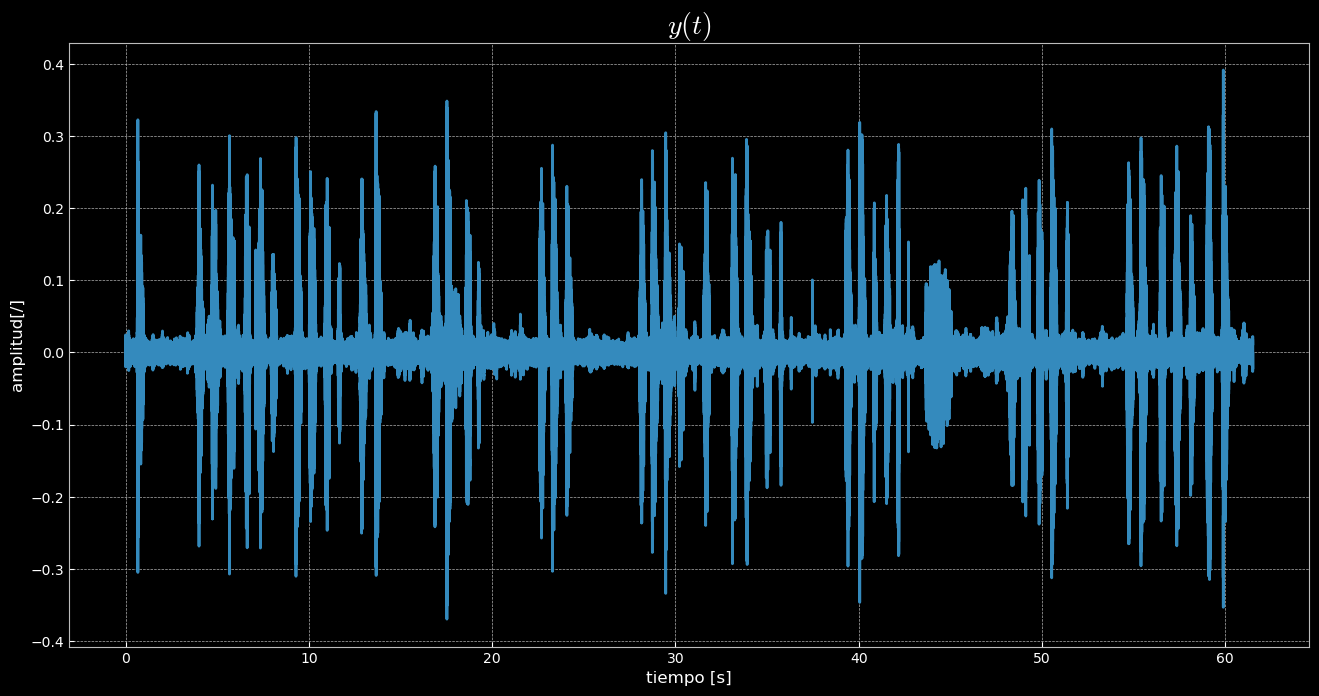

In [9]:
plt.figure()
plt.plot(t, y)
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud[/]')
plt.title(r'$y(t)$', size=20);

In [10]:
X = librosa.stft(y)
X_dB = librosa.amplitude_to_db(np.abs(X))


```python
X = librosa.stft(y)
```
Con *librosa* calculamos *short time fourier transform* para determinar el contenido en frecuencia sinusoidal y de fase en secciones locales de una señal así como sus cambios con respecto al tiempo. Lo que esta función nos devuelve es una matriz de números complejos. Cuya norma es la frecuencia.

Para obtener la norma (tamaño del vector) de estos números complejos utilizamos numpy.absolute(). Esta función lo que hace es que si tiene un número de la forma $$a+bi$$ entonces nos devuelve su norma: $$\sqrt(a^2+b^2)$$



```python
X_dB = librosa.amplitude_to_db(np.abs(X))
```

Ahora convertimos la amplitud a decibeles, que es una escala logaritmica de medidas de contraste.

In [11]:
# Para desplegar el espectrograma cargamos:
from librosa.display import specshow

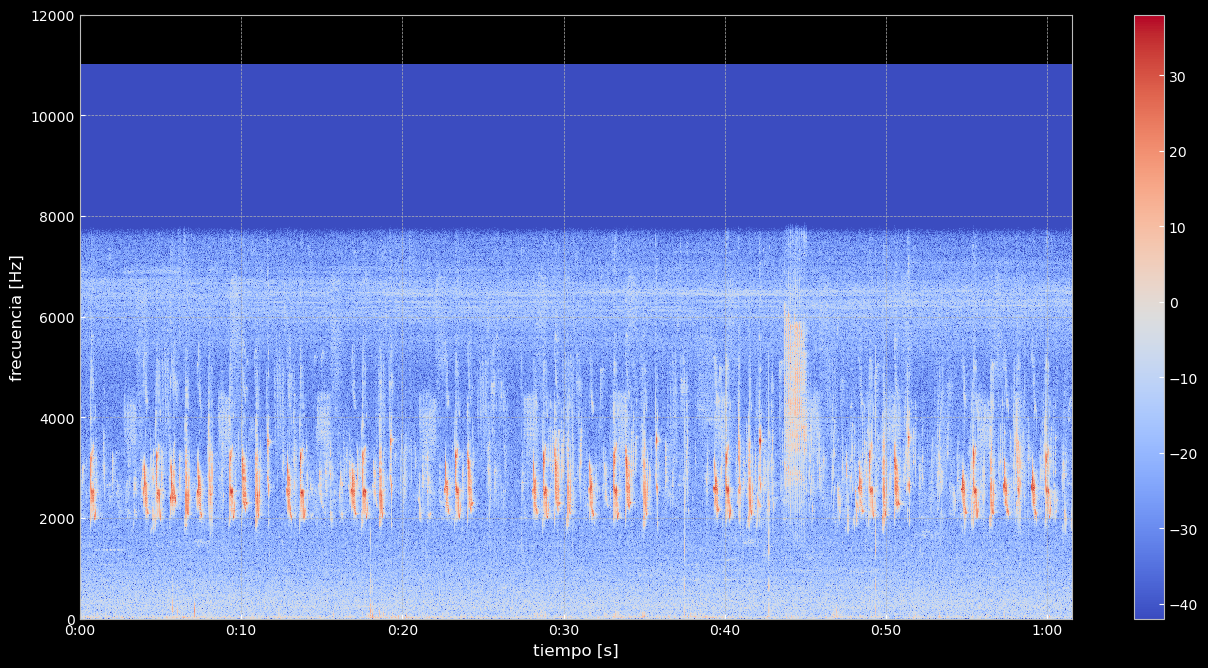

In [12]:
specshow(X_dB, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.xlabel('tiempo [s]')
plt.ylabel('frecuencia [Hz]')
plt.ylim(top=12000)
plt.colorbar()
plt.grid(True)

```python
specshow(X_dB, sr=sampling_rate, x_axis='time', y_axis='hz')
```
En esta línea cargamos la función *specshow* con las variables de interes, la amplitud en decibeles *X_db* y la frecuencia de muestreo *sampling_rate*.

```python
plt.ylim(top=12000)
```
Establezco el máximo en el eje de las ordenadas.

```python
plt.colorbar()
```
Pido que se muestre la barra de color para darnos una idea del rango de amplitudes en decibeles.

### Discutamos un poco acerca de este espectrograma
Pongamos atención en las franjas superiores azúl y negra. ¿Qué es lo que está sucediendo? Por el teorema del muestreo al estar trabajando con una frecuencia de muestreo *sampling_rate=22,050 hz*, sabemos que la máxima frecuencia que se puede registrar es de *sampling_rate/2=11025 Hz*, que representa el máximo de la franja azúl. Al haber estrablecido el máximo de la gráfica en *12,000 Hz* es que existe este espacio sin información que observamos como la franja negra.

Ahora bien, la franja azúl va de *11,025 Hz* a aproximadamente *8,000 Hz* lo cual nos da a pensar en que el micrófono con el que se grabó el audio muestreaba a 16,000 Hz de ahí los 8,000 Hz máximos que llegó a registrar, por el teorema de Nyquits. Dicha franja nos hace pensar que  por alguna razón en el procesamiento del audio se reajustó a una frecuencia de muestreo de *22,050 Hz*, quedando estos espacios "vaciós" en este rango de frecuencias. Digo espacios "vacíos" porque a diferencia de la franja negra estos espacios sí que tienen información.

Para imprimir tanto la serie de tiempo como el espectrograma a la par ejecutamos:

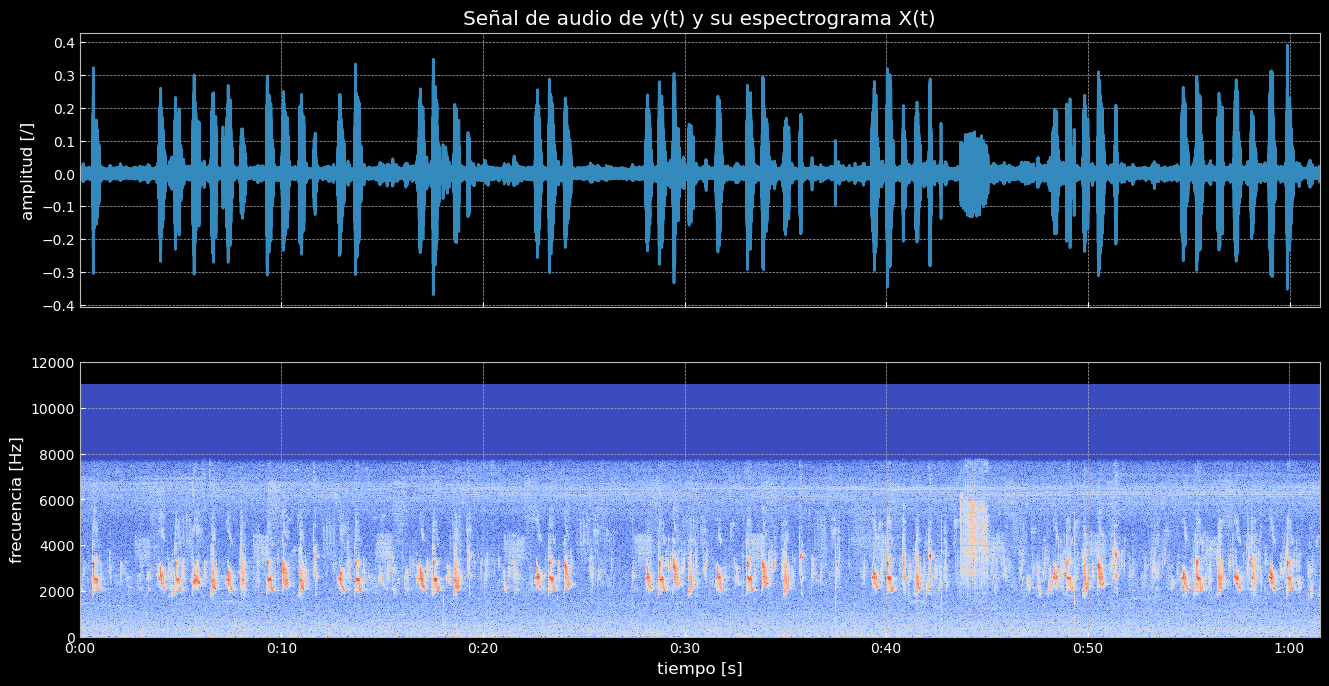

In [13]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(t, y)
plt.xlim([0, T])
plt.ylabel('amplitud [/]')
plt.title('Señal de audio de y(t) y su espectrograma X(t)')
plt.setp(plt.gca().get_xticklabels(), visible=False)
plt.subplot(2,1,2)
specshow(X_dB, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.xlabel('tiempo [s]')
plt.ylabel('frecuencia [Hz]')
plt.ylim(top=12000)

plt.grid(True)

Y con esto términamos esta práctica.

###### Estos son algunos sitios donde pueden encontrar una lista de las librerías y herramientas disponibles relacionadas con esta práctica.

https://librosa.org/doc/latest/index.html

http://cmm.cenart.gob.mx/tallerdeaudio/cursos/cursoardour/Teoria_y_tecnicas/Audiodigital.html


https://es.wikipedia.org/wiki/Transformada_de_Fourier_de_Tiempo_Reducido


https://www.youtube.com/watch?v=3gzI4Z2OFgY&t=615s


https://es.wikipedia.org/wiki/Espectrograma

https://es.wikipedia.org/wiki/Teorema_de_muestreo_de_Nyquist-Shannon